In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data=r'F:\Study\Machine Learning\Tweet Analysis\train_2kmZucJ.csv'
sentiment_df=pd.read_csv(data)

In [ ]:
sentiment_df

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


## Text Cleaning

In [ ]:
import re
import nltk

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer

In [ ]:
#Character group $&@*# represents certain negative comment
# We'll replace these characters with 'hate'
def replace_char(sentence):
    st=re.sub("\$\&\@\*\#","swearing",sentence)
    return st

In [ ]:
sentiment_df['clear_tweet']=sentiment_df['tweet'].apply(lambda x: replace_char(x))

In [ ]:
sentiment_df['clear_tweet'][26]

"swearing my ipod is all messed up and i haven't done nothing to it #swearing #MyLoss ! #Apple"

In [ ]:
#Removing all the words starting with @ since such words indicate some account name which is irrelevant
def remove_char(sentence):
    st=re.sub("@[\w]*"," ",sentence)    
    return st
sentiment_df['clear_tweet']=sentiment_df['clear_tweet'].apply(lambda x: remove_char(x))    

In [ ]:
#Removing all words starting with http since it denote email address
def remove_char1(sentence):
    st=re.sub("http(\S)*"," ",sentence)
    return st

In [ ]:
sentiment_df['clear_tweet']=sentiment_df['clear_tweet'].apply(lambda x: remove_char1(x))

In [ ]:
sentiment_df['clear_tweet'][17]

'Go crazy !! #iphonesia, #iphone, #instagood, #instagram, #photooftheday, #tweegram, ,…  '

In [ ]:
#Still we have to remove all words containing twitter since these only represents some url
def remove_char2(sentence):
    st=re.sub("\S*twitter\S*"," ",sentence)
    return st

In [ ]:
sentiment_df['clear_tweet']=sentiment_df['clear_tweet'].apply(lambda x: remove_char2(x))

In [ ]:
sentiment_df['clear_tweet'][17]

'Go crazy !! #iphonesia, #iphone, #instagood, #instagram, #photooftheday, #tweegram, ,…  '

In [ ]:
def remove_char3(sentence):
    st=re.sub("[^A-Za-z#]"," ",sentence)
    return st

In [ ]:
sentiment_df['clear_tweet']=sentiment_df['clear_tweet'].apply(lambda x: remove_char3(x))

In [ ]:
def remove_char4(sentence):
    st=re.sub("#"," ",sentence)
    return st
sentiment_df['clear_tweet']=sentiment_df['clear_tweet'].apply(lambda x: remove_char4(x))

In [ ]:
sentiment_df['clear_tweet'][0:5]

0     fingerprint  Pregnancy Test    android  apps ...
1    Finally a transparant silicon case    Thanks t...
2    We love this  Would you go   talk  makememorie...
3    I m wired I know I m George I was made that wa...
4    What amazing service  Apple won t even talk to...
Name: clear_tweet, dtype: object

## Stemming and Tokenisation

In [ ]:
sentiment_df['clear_tweet']=sentiment_df['clear_tweet'].apply(lambda x: x.lower())

In [ ]:
sentiment_df['tokened_tweet']=sentiment_df['clear_tweet'].apply(lambda x: x.split())

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()


[nltk_data] Downloading package wordnet to C:\Users\HP
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
sentiment_df['tokened_tweet']=sentiment_df['tokened_tweet'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

In [ ]:
sentiment_df['tokened_tweet'].head()

0    [fingerprint, pregnancy, test, android, apps, ...
1    [finally, a, transparant, silicon, case, thank...
2    [we, love, this, would, you, go, talk, makemem...
3    [i, m, wired, i, know, i, m, george, i, wa, ma...
4    [what, amazing, service, apple, won, t, even, ...
Name: tokened_tweet, dtype: object

In [ ]:
sentiment_df['tokened_tweet']=sentiment_df['tokened_tweet'].apply(lambda x: " ".join(x))

In [ ]:
sentiment_df['tokened_tweet']

0       fingerprint pregnancy test android apps beauti...
1       finally a transparant silicon case thanks to m...
2       we love this would you go talk makememories un...
3       i m wired i know i m george i wa made that way...
4       what amazing service apple won t even talk to ...
                              ...                        
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely year old neighbor with her i...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tokened_tweet, Length: 7920, dtype: object

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import STOPWORDS,wordcloud

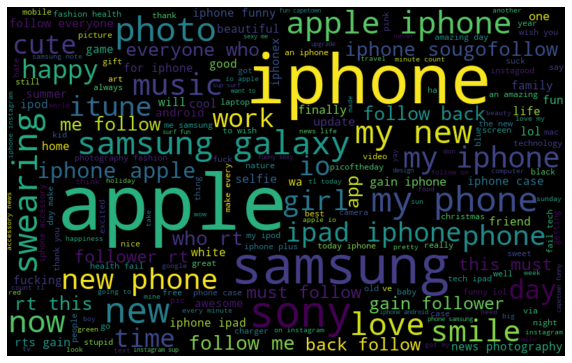

In [ ]:
all_words = ' '.join([text for text in sentiment_df['tokened_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

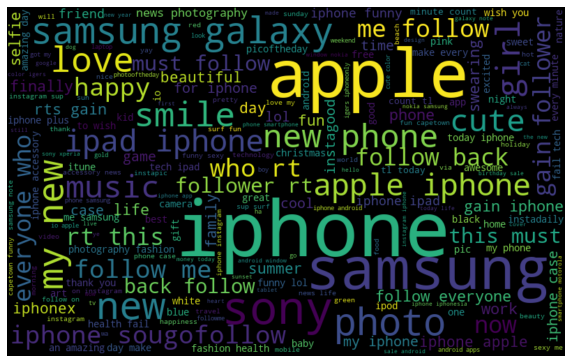

In [ ]:
#Let's see the word cloud of positive or neutral reviews
positive_words = ' '.join([text for text in sentiment_df['tokened_tweet'][sentiment_df['label']==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

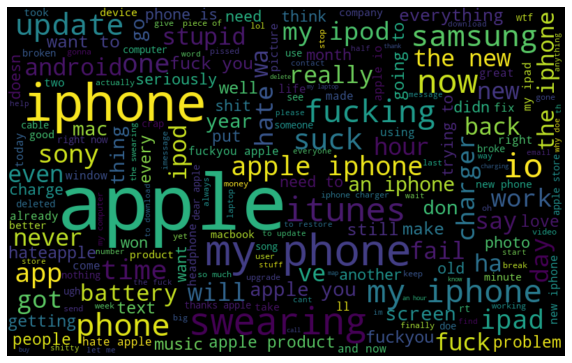

In [ ]:
#Now we'll analyze negative tweets
negative_words = ' '.join([text for text in sentiment_df['tokened_tweet'][sentiment_df['label']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#There are some words common in both positive and negative reviews and furhter not representng any emotion
words=['phone','battery','apple','music','ipad','ipod','iphone','samsung','galaxy','itunes','charger','sony','io','android','macbook','iphonex','app','photo']

In [ ]:
def remove_words(sentence):
    querywords = sentence.split()
    resultwords  = [word for word in querywords if word not in words]
    result = ' '.join(resultwords)
    return result

In [ ]:
sentiment_df['tokened_tweet']=sentiment_df['tokened_tweet'].apply(lambda x: remove_words(x))

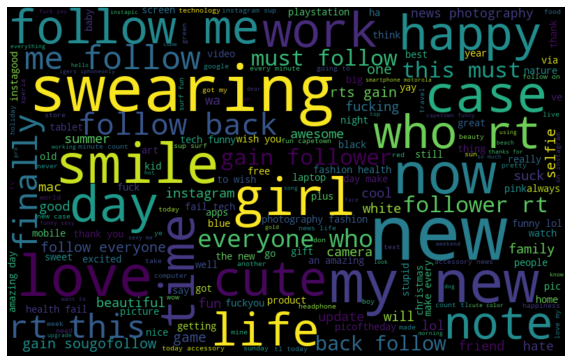

In [ ]:
all_words = ' '.join([text for text in sentiment_df['tokened_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
st_words=stopwords.words('english')

In [ ]:
lis=['no','not','nor','too','very','don\'t','should','couldn\'t','didn\'t','doesn\'t','hadn\'t','hasn\'t','haven\'t','isn\'t','mustn\'t','needn\'t','won\'t']
for i in lis:
    st_words.remove(i)

In [ ]:
def remove_words2(sentence):
    querywords = sentence.split()
    resultwords  = [word for word in querywords if word not in st_words]
    result = ' '.join(resultwords)
    return result

In [ ]:
sentiment_df['tokened_tweet']=sentiment_df['tokened_tweet'].apply(lambda x: remove_words2(x))

## Creating bag of words features

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(sentiment_df['tokened_tweet']).toarray()
y=sentiment_df.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.3,random_state=0)

In [ ]:
X.shape

(7920, 1500)

## Model Building

### Naive Bayes model

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [ ]:
gnb.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn.metrics import f1_score,confusion_matrix

In [ ]:
y_pred=gnb.predict(X_test)

In [ ]:
print('f1-score:',f1_score(y_test,y_pred))

f1-score: 0.6482696222574079


In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2556 1555]
 [   0 1433]]


### Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1,solver='liblinear')

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
print('f1-score:',f1_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)

f1-score: 0.680932365303783
[[3818  293]
 [ 542  891]]


### KNN Classifier model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNC=KNeighborsClassifier()

In [ ]:
KNC.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred=KNC.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[3980  131]
 [1177  256]]


In [ ]:
print('f1-score:',f1_score(y_test,y_pred))

f1-score: 0.28131868131868126


### Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
grb= GradientBoostingClassifier()

In [ ]:
grb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred=grb.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[3987  124]
 [ 939  494]]


In [ ]:
print('f1-score:',f1_score(y_test,y_pred))

f1-score: 0.48171623598244756


**The best model for this sentiment analyzer is Logistic Regression giving f1-score of .68**